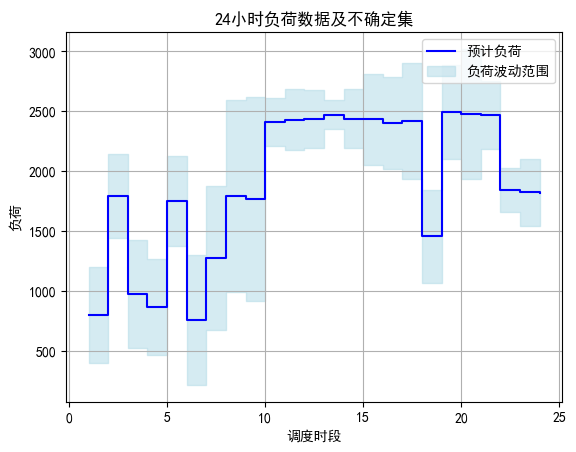

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用于正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用于正常显示负号

# 调度时段

time_periods = np.arange(1, 25)


# 预计负荷

expected_load = np.array([

    802, 1791, 977, 866, 1751, 761, 1278, 1797, 1771, 2409, 2429, 2438,

    2474, 2440, 2433, 2404, 2419, 1458, 2494, 2477, 2469, 1848, 1825, 1821

])


# 负载可能变化

load_uncertainty = np.array([

    400, 350, 450, 400, 375, 543, 600, 800, 850, 200, 254, 240, 124, 244,

    383, 386, 481, 385, 389, 543, 286, 184, 282, 182

])


# 计算负荷变化范围

lower_bound = expected_load - load_uncertainty

upper_bound = expected_load + load_uncertainty


# 创建最坏场景的负荷数组

worst_case_load = np.copy(expected_load)

worst_case_load[2] = lower_bound[2]  # 第三个时段负荷变化到最小

worst_case_load[0:2] = upper_bound[0:2]

worst_case_load[3:] = upper_bound[3:]  # 其余时刻负荷变化到最大



# 使用阶梯图绘制预计负荷

plt.step(time_periods, expected_load, label='预计负荷', color='blue', where='post')

plt.fill_between(time_periods, lower_bound, upper_bound,

                 step='post', color='lightblue', alpha=0.5, label='负荷波动范围')
'''

# 添加最坏场景线

plt.step(time_periods, worst_case_load, label='最坏场景',

         color='red', linestyle='--', where='post')
'''

# 添加图例和标签

plt.legend()

plt.xlabel('调度时段')

plt.ylabel('负荷')

plt.title('24小时负荷数据及不确定集')

plt.grid(True)


# 显示图形

plt.savefig('./论文图片/负荷数据.svg')

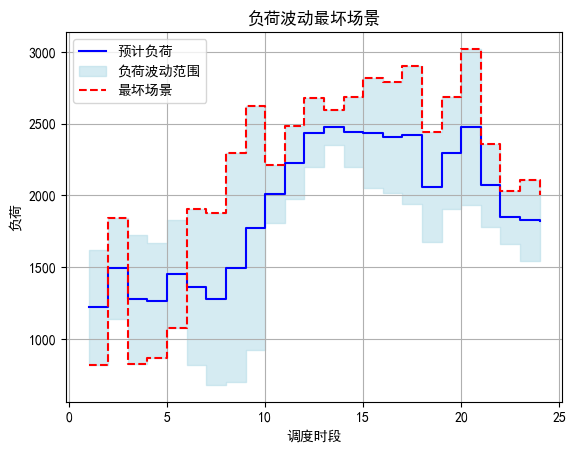

In [13]:

# 调度时段
time_periods = np.arange(1, 25)

# 预计负荷
expected_load = np.array([
    1220,1491,1277,1266,1451,1361,1278,1497,1771,2009,2229,2438,2474,2440,2433,2404,2419,2058,2294,2477,2069,1848,1825,1821
])

# 负载可能变化
load_uncertainty = np.array([
    400,350,450,400,375,543,600,800,850,200,254,240,124,244,383,386,481,385,389,543,286,184,282,182,
])

# 计算负荷变化范围
lower_bound = expected_load - load_uncertainty
upper_bound = expected_load + load_uncertainty

u = np.array([
    -1,1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
])

# 创建最坏场景的负荷数组
worst_case_load = expected_load + u*load_uncertainty


# 使用阶梯图绘制预计负荷
plt.step(time_periods, expected_load, label='预计负荷', color='blue', where='post')
plt.fill_between(time_periods, lower_bound, upper_bound,
                 step='post', color='lightblue', alpha=0.5, label='负荷波动范围')

# 添加最坏场景线
plt.step(time_periods, worst_case_load, label='最坏场景',
         color='red', linestyle='--', where='post')

# 添加图例和标签
plt.legend()
plt.xlabel('调度时段')
plt.ylabel('负荷')
plt.title('负荷波动最坏场景')
plt.grid(True)

# 显示图形
plt.savefig('./论文图片/最坏场景.svg')

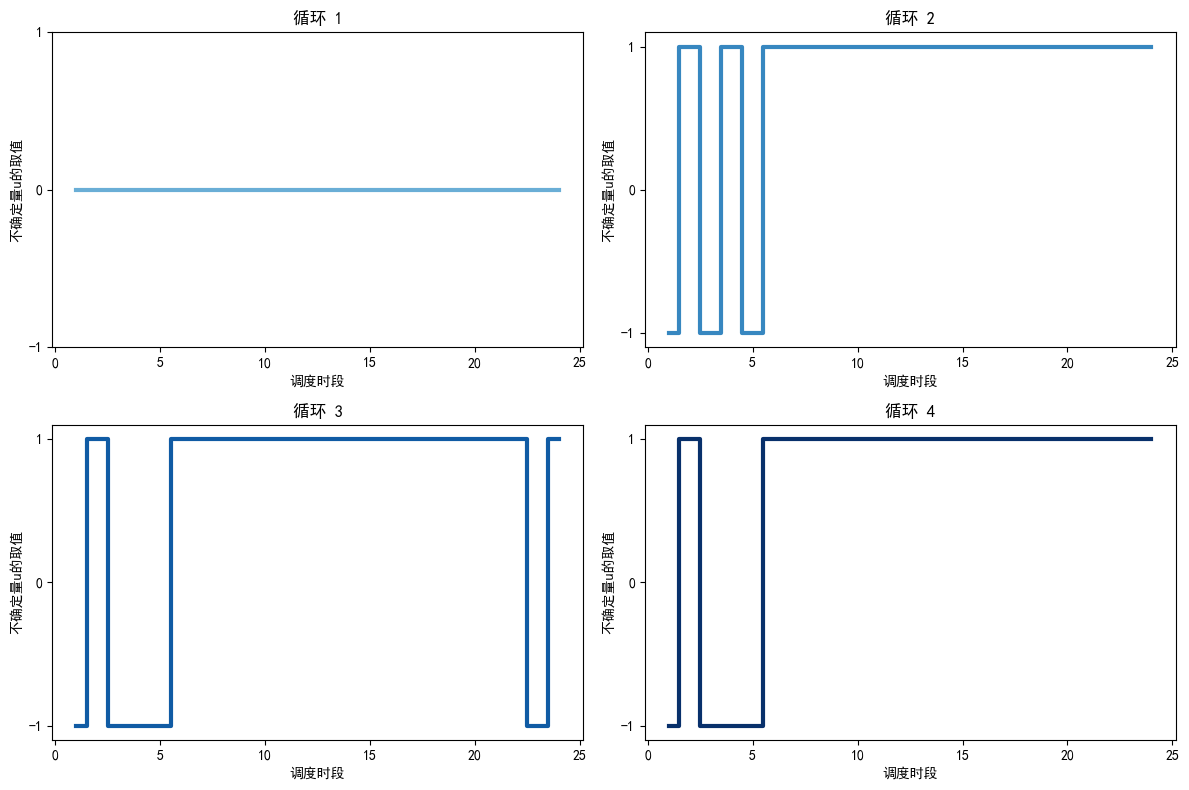

In [5]:
# 展示最终求解u的结果
# 循环中的u值
u_values = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [-1, 1, -1, 1, -1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
        1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [-1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
        1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0],
    [-1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
        1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
]


# 生成颜色从浅到深
colors = cm.Blues(np.linspace(0.5, 1, len(u_values)))

# 创建2x2子图
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 绘制每个子图
for i, u in enumerate(u_values):
    ax = axes[i//2, i % 2]  # 选择子图位置
    ax.step(range(1, 25), u, where='mid', color=colors[i], linewidth=3)
    ax.set_title(f'循环 {i+1}')
    ax.set_xlabel('调度时段')
    ax.set_ylabel('不确定量u的取值')
    ax.set_yticks([-1, 0, 1])  # 设置 y 轴刻度
    ax.grid(False)

# 调整布局
plt.tight_layout()

# 显示图形
plt.savefig('./论文图片/u.svg')

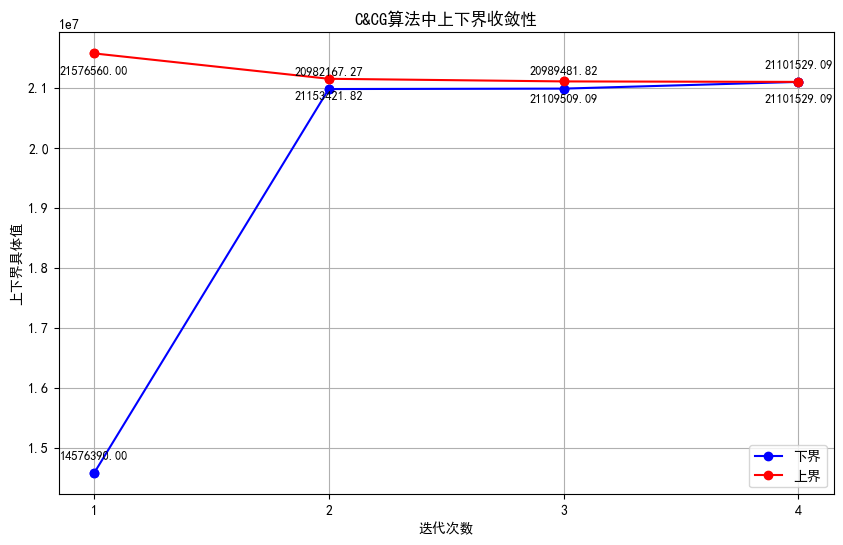

In [6]:
# 数据
lower_bound = [14576390.0, 20982167.27272726,
               20989481.818181813, 21101529.09090909]
upper_bound = [21576560.0, 21153421.818181816,
               21109509.09090909, 21101529.09090909]

# X 轴的值（迭代点）
iterations = np.arange(1, len(lower_bound) + 1)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(iterations, lower_bound, label='下界', color='blue', marker='o')
plt.plot(iterations, upper_bound, label='上界', color='red', marker='o')
plt.scatter(iterations, lower_bound, color='blue')
plt.scatter(iterations, upper_bound, color='red')

# 标注数据点的具体值
for i, (lb, ub) in enumerate(zip(lower_bound, upper_bound)):
    plt.annotate(f'{lb:.2f}', (iterations[i], lb), textcoords="offset points", xytext=(
        0, 10), ha='center', fontsize=9)
    plt.annotate(f'{ub:.2f}', (iterations[i], ub), textcoords="offset points", xytext=(
        0, -15), ha='center', fontsize=9)

# 设置标签和标题
plt.xlabel('迭代次数')
plt.ylabel('上下界具体值')
plt.title('C&CG算法中上下界收敛性')
plt.legend(loc='lower right')
plt.grid(True)

# 调整 x 轴只显示整数值
plt.xticks(iterations)

# 显示图形
plt.savefig('./论文图片/C&CG收敛性.svg')

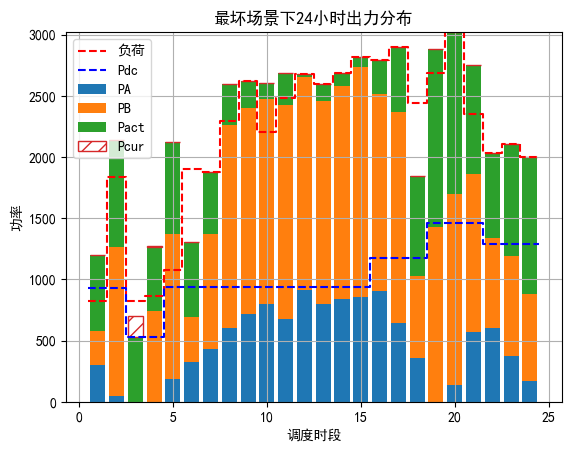

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
PA = [304, 50, 0, 0, 187, 327, 430, 606, 716, 802, 681, 911,
      796, 837, 855, 903, 644, 360, 0, 140, 567, 600, 372, 172]
PB = [274, 1213, 0, 739, 1188, 366, 940, 1659, 1683, 1671, 1745, 1740,
      1660, 1746, 1878, 1614, 1724, 667, 1425, 1562, 1297, 742, 817, 713]
Pact = [624, 878, 527, 527, 751, 611, 508, 332, 222, 136, 257, 27,
        142, 101, 83, 273, 532, 816, 1458, 1318, 891, 690, 918, 1118]
Pcur = [0, 0, 174, 10, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Pdc = [928, 928, 527, 527, 938, 938, 938, 938, 938, 938, 938, 938, 938, 938, 938, 1176, 1176, 1176, 1458, 1458, 1458, 1290, 1290, 1290]


# 调度时段
time_periods = np.arange(1, 25)


worst_case_time = np.arange(0.5, 24.5, 1)

# 绘制柱形图
bar_width = 0.8
PA_bar = np.array(PA)
PB_bar = np.array(PB)
Pact_bar = np.array(Pact)
Pcur_bar = np.array(Pcur)

# 配色方案改进
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
hatch_color = '#d62728'

plt.bar(time_periods, PA_bar, color=colors[0], width=bar_width, label='PA')
plt.bar(time_periods, PB_bar, bottom=PA_bar,
        color=colors[1], width=bar_width, label='PB')
plt.bar(time_periods, Pact_bar, bottom=PA_bar + PB_bar,
        color=colors[2], width=bar_width, label='Pact')
plt.bar(time_periods, Pcur_bar, bottom=PA_bar + PB_bar + Pact_bar,
        width=bar_width, label='Pcur', hatch='//', edgecolor=hatch_color, fill=False)

# 添加最坏场景线，修正转折点
plt.step(np.append(worst_case_time, worst_case_time[-1] + 1), np.append(
    worst_case_load, worst_case_load[-1]), label='负荷', color='red', linestyle='--', where='post')

# 添加Pdc线
plt.step(np.append(worst_case_time, worst_case_time[-1] + 1), np.append(
    Pdc, Pdc[-1]), label='Pdc', color='blue', linestyle='--', where='post')
    
# 添加图例和标签
plt.legend()
plt.xlabel('调度时段')
plt.ylabel('功率')
plt.title('最坏场景下24小时出力分布')
plt.grid(True)

# 显示图形
plt.show()

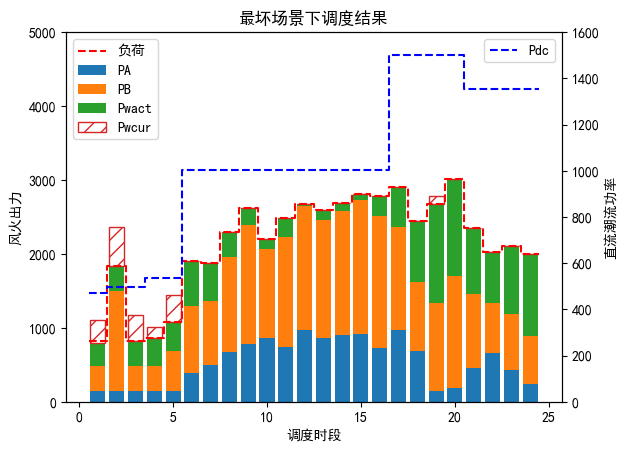

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
PA = [150, 150, 150, 150, 150, 393.5455, 496.5455, 672.5455, 782.5455, 868.5455, 747.5455, 977.5455,
      862.5455, 903.5455, 921.5455, 731.5455, 968, 684, 150, 182, 462, 663, 435, 235]
PB = [
    330,
    1344,
    330,
    330,
    540,
    899.4545455,
    873.4545455,
    1292.454545,
    1616.454545,
    1204.454545,
    1478.454545,
    1673.454545,
    1593.454545,
    1679.454545,
    1811.454545,
    1785.454545,
    1400,
    943,
    1183,
    1520,
    1002,
    679,
    754,
    650
]
Pact = [
    322,
    347,
    347,
    386,
    386,
    611,
    508,
    332,
    222,
    136,
    257,
    27,
    142,
    101,
    83,
    273,
    532,
    816,
    1350,
    1318,
    891,
    690,
    918,
    1118
]
Pcur = [
    302,
    531,
    354,
    151,
    365,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    108,
    0,
    0,
    0,
    0,
    0
]

Pdc = [
    472,
    497,
    497,
    536,
    536,
    1004.545455,
    1004.545455,
    1004.545455,
    1004.545455,
    1004.545455,
    1004.545455,
    1004.545455,
    1004.545455,
    1004.545455,
    1004.545455,
    1004.545455,
    1500,
    1500,
    1500,
    1500,
    1353,
    1353,
    1353,
    1353
]

# 调度时段
time_periods = np.arange(1, 25)


# 转换为绘制最坏场景的时间点
worst_case_time = np.arange(0.5, 24.5, 1)

# 创建图形和左轴
fig, ax1 = plt.subplots()

# 绘制柱形图
bar_width = 0.8
PA_bar = np.array(PA)
PB_bar = np.array(PB)
Pact_bar = np.array(Pact)
Pcur_bar = np.array(Pcur)

# 配色方案改进
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
hatch_color = '#d62728'

ax1.bar(time_periods, PA_bar, color=colors[0], width=bar_width, label='PA')
ax1.bar(time_periods, PB_bar, bottom=PA_bar,
        color=colors[1], width=bar_width, label='PB')
ax1.bar(time_periods, Pact_bar, bottom=PA_bar + PB_bar,
        color=colors[2], width=bar_width, label='Pwact')
ax1.bar(time_periods, Pcur_bar, bottom=PA_bar + PB_bar + Pact_bar,
        width=bar_width, label='Pwcur', hatch='//', edgecolor=hatch_color, fill=False)

# 添加最坏场景线，修正转折点
ax1.step(np.append(worst_case_time, worst_case_time[-1] + 1), np.append(
    worst_case_load, worst_case_load[-1]), label='负荷', color='red', linestyle='--', where='post')

# 添加左轴标签
ax1.set_xlabel('调度时段')
ax1.set_ylabel('风火出力')
ax1.set_ylim(0, 5000)
ax1.legend(loc='upper left')
ax1.grid(False)

# 创建右轴
ax2 = ax1.twinx()

# 添加Pdc线
ax2.step(np.append(worst_case_time, worst_case_time[-1] + 1), np.append(
    Pdc, Pdc[-1]), label='Pdc', color='blue', linestyle='--', where='post')

# 添加右轴标签
ax2.set_ylabel('直流潮流功率')
ax2.set_ylim(0, 1600)
ax2.legend(loc='upper right')

# 添加图标题
plt.title('最坏场景下调度结果')



# 显示图形
plt.savefig('./论文图片/最坏场景下调度结果.svg')